In [79]:
#import nessary model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#read csv file

df=pd.read_csv("6.Mall_Customers.csv",index_col="CustomerID")

In [81]:
df.shape

(200, 4)

In [82]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [85]:
# i choose dependent and indepentent two feature "Annual income and spending score"

X=df.iloc[:,[2,3]].values

In [86]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

find the correct number of clusters

And find WCSS-Within Cluster Sum of Squares

In [87]:
# ths code use remove the warning
import warnings
warnings.filterwarnings("ignore")

In [88]:
#import KMeans cluster

from sklearn.cluster import KMeans

In [89]:
# i give 10 number of cluster itreded and add wcss score

wcss=[]
   for g in range(1,11) :
     kmean=KMeans(n_clusters=g,init="k-means++",random_state=42)
     kmean=kmean.fit(X)
     wcss.append(kmean.inertia_)
    

In [90]:
# check wcss values

wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25036.417604033984,
 21916.794789843727,
 20072.07093940401]

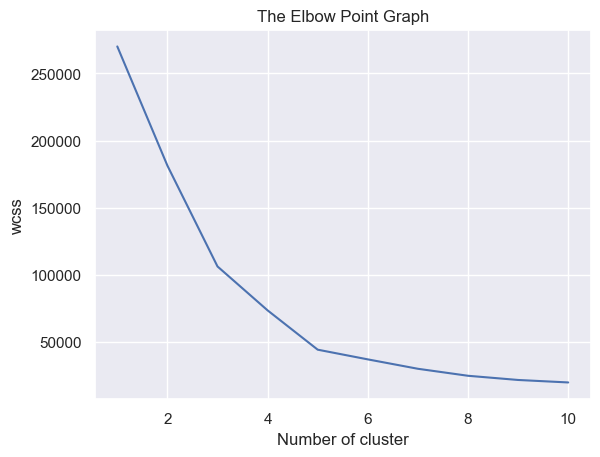

In [91]:
# i find k correct value to using Elbow graph method

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()

Number of cluster= 5 , because these elbow points graph give 3 and 5 two line bend place but 5 drop line after nothing point is drop ,that also number of cluster is 5

In [92]:
# finally i find correct K value then i 5 split the five cluster of dataset

kmean=KMeans(n_clusters=5,init="k-means++",random_state=0)
 y=kmean.fit_predict(X)

In [93]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

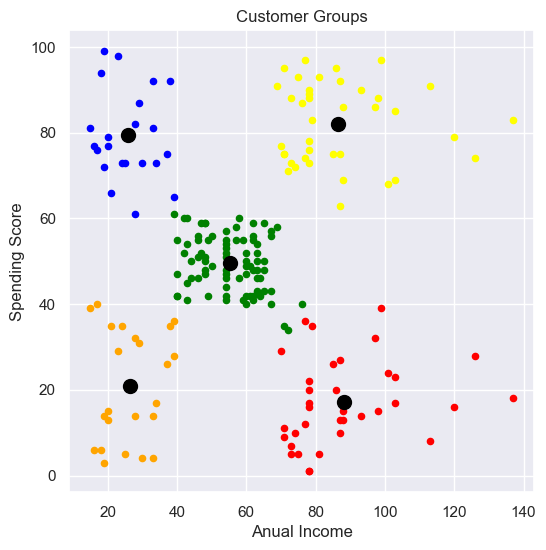

In [94]:
#ploting all the cluster and centroids

plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0],X[y==0,1],s=20,c='green',label="Cluster 1")
plt.scatter(X[y==1,0],X[y==1,1],s=20,c='yellow',label="Cluster 2")
plt.scatter(X[y==2,0],X[y==2,1],s=20,c='red',label="Cluster 3")
plt.scatter(X[y==3,0],X[y==3,1],s=20,c='orange',label="Cluster 4")
plt.scatter(X[y==4,0],X[y==4,1],s=20,c='blue',label="Cluster 5")

#plot the centroid

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title("Customer Groups")
plt.xlabel("Anual Income")
plt.ylabel("Spending Score")
plt.show()

#### Conclution

 * There are two types of low-income people here: one set of people has low income but spends more        money   in the mall, and another set of people has low income and spends less money in the mall. 

 * Similarly, there are two types of high-income people here: one set has high income but spends less      money inthe mall, and another set of high-income people spends more money in the mall.

 * Additionally, there is a group of people with a medium income who spend an average amount in the        mall.Interestingly, more medium-income people come to the mall compared to both low and high-income    individuals.>
